In [53]:
# Nome: Vinícius Costa Gansoldi RA: 245274

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [54]:
# Criando a base de dados primária, salvando como "df1" e printando

tipoAtendimento = ["Muito Ruim", "Ruim", "Medio", "Bom", "Muito Bom"]
memoria = [16, 32, 64]
camera = []
RAM = []
armInt = []
atendimento = []
preço = []
alternativas = []
cont = 10
pesos = pd.DataFrame({"Alternativas": ["Pesos"], 
                  "Camera(Maximizar)": [0.30],
                  "Memória RAM(Maximizar)": [0.2],
                  "Atendimento(Maximizar)": [0.1],
                  "Preço(Minimizar)": [0.4]})

for c in range(cont):
  camera.append(random.randrange(8, 32, 2))
  RAM.append(random.randrange(2, 9, 2))
  armInt.append(memoria[random.randrange(0, 3)])
  atendimento.append(tipoAtendimento[random.randint(0, 4)])
  preço.append(random.uniform(2000, 3000))
  alternativas.append("A" + str(c + 1))

df0 = pd.DataFrame({"Alternativas": alternativas, 
                  "Camera(Maximizar)": camera,
                  "Memória RAM(Maximizar)": RAM,
                  "Atendimento(Maximizar)": atendimento,
                  "Preço(Minimizar)": preço})
df1 = df0.append(pesos, ignore_index=True)
df1

,Alternativas,Camera(Maximizar),Memória RAM(Maximizar),Atendimento(Maximizar),Preço(Minimizar)
0,A1,18.0,8.0,Muito Bom,2010.613801
1,A2,26.0,8.0,Bom,2570.606744
2,A3,24.0,6.0,Muito Bom,2927.853874
3,A4,30.0,6.0,Muito Ruim,2436.817421
4,A5,22.0,6.0,Bom,2911.762928
5,A6,8.0,6.0,Medio,2534.599902
6,A7,14.0,4.0,Ruim,2695.015781
7,A8,8.0,4.0,Muito Bom,2475.434865
8,A9,8.0,4.0,Medio,2628.787519
9,A10,10.0,8.0,Muito Bom,2915.238438


In [55]:
# Criando uma função para cada normalização dada na aula, salvando "df2" como uma cópia de "df1"

def normalização0_1(a, maximo=True):
  """
  Essa normalização sempre define o maior valor como 0 e o menor, 
  valor como 1 ela tambem favorece sempre o maior valor.
  """
  if maximo:
    return ( a - np.min(a) ) / ( np.max(a) - np.min(a) )
  else:
    return ( np.max(a) - a ) / ( np.max(a) - np.min(a) )


def normalizaçãoMAX(a, maximo=True):
  """
  Essa normalização sempre define o maior valor como 1, 
  como cada valor é dividido pelo valor maximo, não há valor 0
  e faz com que os valores sejam normalizados para cima.
  """
  if maximo:
    return ( a ) / ( np.max(a) )
  else:
    return ( 1 - ( a ) / ( np.max(a) ) )


def normalizaçãoSOMA(a, maximo=True):
  """
  Essa normalização sempre define o menor valor como 0, 
  como cada valor é dividido pelo soma de todos os valores, não há valor 1
  e faz com que os valores sejam normalizados para baixo.
  """
  if maximo:
    return ( a ) / ( np.sum(a) )
  else:
    return ( 1 - ( a ) / ( np.sum(a) ) )


def normalizaçãoEuclidiana(a, maximo=True):
  """
  Essa normalização faz com que os valores se distanciem do valor
  maximo e minimo(0 e 1), deixando-os mais próximos.
  """
  if maximo:
    return ( a ) / np.sqrt( np.sum( np.square( a ) ) )
  else:
    return 1 - ( a ) / np.sqrt( np.sum( np.square( a ) ) )


def randcolor():
  rgb = (random.random(), random.random(), random.random())
  return  rgb

df2 = df1.copy()
df2

,Alternativas,Camera(Maximizar),Memória RAM(Maximizar),Atendimento(Maximizar),Preço(Minimizar)
0,A1,18.0,8.0,Muito Bom,2010.613801
1,A2,26.0,8.0,Bom,2570.606744
2,A3,24.0,6.0,Muito Bom,2927.853874
3,A4,30.0,6.0,Muito Ruim,2436.817421
4,A5,22.0,6.0,Bom,2911.762928
5,A6,8.0,6.0,Medio,2534.599902
6,A7,14.0,4.0,Ruim,2695.015781
7,A8,8.0,4.0,Muito Bom,2475.434865
8,A9,8.0,4.0,Medio,2628.787519
9,A10,10.0,8.0,Muito Bom,2915.238438


In [56]:
# Trocando os valores da coluna "df2[Atendimento(Maximizar)"] por números entre 1 e 5
# Salvando "df3" como a nova coluna "df2[Atendimento(Maximizar)"]

troca = {"Muito Ruim": 1, 
         "Ruim": 2, 
         "Medio": 3, 
         "Bom": 4, 
         "Muito Bom": 5}

df2["Atendimento(Maximizar)"] = df2["Atendimento(Maximizar)"].replace(troca)
df3 = df2[0:10]["Atendimento(Maximizar)"].copy(deep=True)
df3.head()

0    5.0
1    4.0
2    5.0
3    1.0
4    4.0
Name: Atendimento(Maximizar), dtype: float64

In [57]:
# Criando data frames para cada uma das normalizações e aplicando-as

df_01 = df2.copy(deep=True)
df_MAX = df2.copy(deep=True)
df_SOMA = df2.copy(deep=True)
df_Euclidiana = df2.copy(deep=True)

for c in range(len(df2.columns)-1):
  if (c+1) != 5: 
    df_01.iloc[0:10, c+1] = normalização0_1(df2.iloc[0:10, c+1])
    df_MAX.iloc[0:10, c+1] = normalizaçãoMAX(df2.iloc[0:10, c+1])
    df_SOMA.iloc[0:10, c+1] = normalizaçãoSOMA(df2.iloc[0:10, c+1])
    df_Euclidiana.iloc[0:10, c+1] = normalizaçãoEuclidiana(df2.iloc[0:10, c+1])
  else:
    df_01.iloc[0:10, c+1] = normalização0_1(df2.iloc[0:10, c+1], maximo=False)
    df_MAX.iloc[0:10, c+1] = normalizaçãoMAX(df2.iloc[0:10, c+1], maximo=False)
    df_SOMA.iloc[0:10, c+1] = normalizaçãoSOMA(df2.iloc[0:10, c+1], maximo=False)
    df_Euclidiana.iloc[0:10, c+1] = normalizaçãoEuclidiana(df2.iloc[0:10, c+1], maximo=False )

In [58]:
# Adicionando a coluna de resposta para cada normalização

resultado_01 = []
resultado_MAX = []
resultado_SOMA = []
resultado_Euclidiana = []

for i, j in df2.iterrows():
    resultado_01.append(np.sum(df_01.iloc[10, 1:] * df_01.iloc[i, 1:]))
    resultado_MAX.append(np.sum(df_MAX.iloc[10, 1:] * df_MAX.iloc[i, 1:]))
    resultado_SOMA.append(np.sum(df_SOMA.iloc[10, 1:] * df_SOMA.iloc[i, 1:]))
    resultado_Euclidiana.append(np.sum(df_Euclidiana.iloc[10, 1:] * df_Euclidiana.iloc[i, 1:]))


df_01["Resultado"] = resultado_01
df_MAX["Resultado"] = resultado_MAX
df_SOMA["Resultado"] = resultado_SOMA
df_Euclidiana["Resultado"] = resultado_Euclidiana

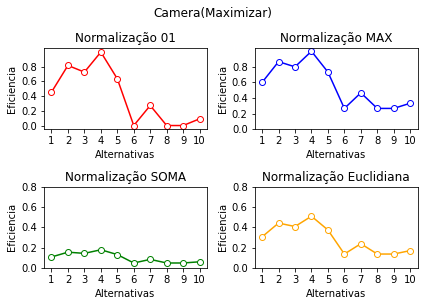

In [59]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(alt_1_10, df_01[0:10]["Camera(Maximizar)"], color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(alt_1_10, df_MAX[0:10]["Camera(Maximizar)"], color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(alt_1_10, df_SOMA[0:10]["Camera(Maximizar)"], color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(alt_1_10, df_Euclidiana[0:10]["Camera(Maximizar)"], color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(alt_1_10)
    ax.set_yticks(efc_01)

st = fig.suptitle("Camera(Maximizar)", y=1.05)
fig.tight_layout()
plt.show()

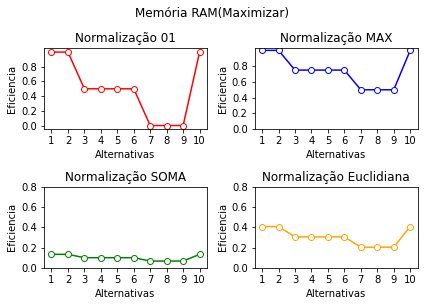

In [60]:
fig, axs = plt.subplots(2, 2)
alt_1_10 = np.arange(1, 11, 1)
efc_01 = np.arange(0, 1, 0.2)

axs[0, 0].plot(alt_1_10, df_01[0:10]["Memória RAM(Maximizar)"], color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(alt_1_10, df_MAX[0:10]["Memória RAM(Maximizar)"], color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(alt_1_10, df_SOMA[0:10]["Memória RAM(Maximizar)"], color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(alt_1_10, df_Euclidiana[0:10]["Memória RAM(Maximizar)"], color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(alt_1_10)
    ax.set_yticks(efc_01)

st = fig.suptitle("Memória RAM(Maximizar)", y=1.05)
fig.tight_layout()
plt.show()
#mcdm

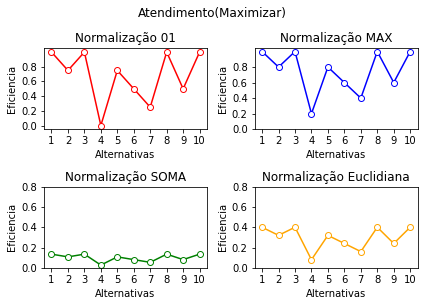

In [61]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(alt_1_10, df_01[0:10]["Atendimento(Maximizar)"], color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(alt_1_10, df_MAX[0:10]["Atendimento(Maximizar)"], color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(alt_1_10, df_SOMA[0:10]["Atendimento(Maximizar)"], color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(alt_1_10, df_Euclidiana[0:10]["Atendimento(Maximizar)"], color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(alt_1_10)
    ax.set_yticks(efc_01)

st = fig.suptitle("Atendimento(Maximizar)", y=1.05)
fig.tight_layout()
plt.show()

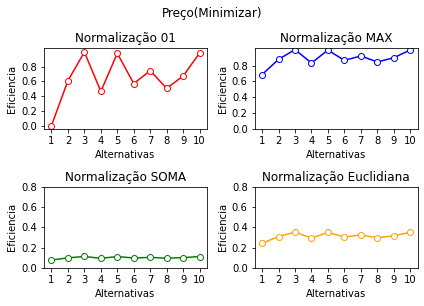

In [62]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(alt_1_10, df_01[0:10]["Preço(Minimizar)"], color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(alt_1_10, df_MAX[0:10]["Preço(Minimizar)"], color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(alt_1_10, df_SOMA[0:10]["Preço(Minimizar)"], color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(alt_1_10, df_Euclidiana[0:10]["Preço(Minimizar)"], color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(alt_1_10)
    ax.set_yticks(efc_01)

st = fig.suptitle("Preço(Minimizar)", y=1.05)
fig.tight_layout()
plt.show()
#mcdm

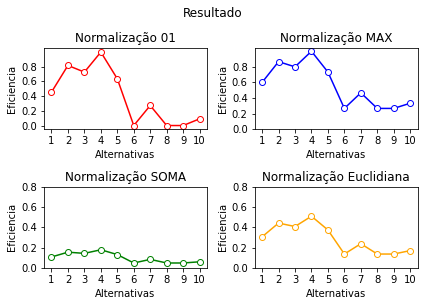

In [63]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(alt_1_10, df_01[0:10]["Camera(Maximizar)"], color="red", marker="o", markerfacecolor="white")
axs[0, 0].set_title('Normalização 01')

axs[0, 1].plot(alt_1_10, df_MAX[0:10]["Camera(Maximizar)"], color="blue", marker="o", markerfacecolor="white")
axs[0, 1].set_title('Normalização MAX')

axs[1, 0].plot(alt_1_10, df_SOMA[0:10]["Camera(Maximizar)"], color="green", marker="o", markerfacecolor="white")
axs[1, 0].set_title('Normalização SOMA')

axs[1, 1].plot(alt_1_10, df_Euclidiana[0:10]["Camera(Maximizar)"], color="orange", marker="o", markerfacecolor="white")
axs[1, 1].set_title('Normalização Euclidiana')

for ax in axs.flat:
    ax.set(xlabel='Alternativas', ylabel='Eficiencia')
    ax.set_xticks(alt_1_10)
    ax.set_yticks(efc_01)

st = fig.suptitle("Resultado", y=1.05)
fig.tight_layout()
plt.show()
#mcdm

In [64]:
df_Resultado01 = pd.DataFrame({"Alternativas 01": df1[0:10]["Alternativas"],
                               "Normalização 01": df_01[0:10]["Resultado"]})

df_ResultadoMAX = pd.DataFrame({"Alternativas MAX": df1[0:10]["Alternativas"],
                               "Normalização MAX": df_MAX[0:10]["Resultado"]})

df_ResultadoSOMA = pd.DataFrame({"Alternativas SOMA": df1[0:10]["Alternativas"],
                               "Normalização SOMA": df_SOMA[0:10]["Resultado"]})

df_ResultadoEuclidiana = pd.DataFrame({"Alternativas Euclidiana": df1[0:10]["Alternativas"],
                             "Normalização Euclidiana": df_Euclidiana[0:10]["Resultado"]})





df_Resultado01 = df_Resultado01.sort_values(["Normalização 01", "Alternativas 01"], ascending=False)
df_Resultado01 = df_Resultado01.reset_index(drop=True)
df_ResultadoMAX = df_ResultadoMAX.sort_values(["Normalização MAX", "Alternativas MAX"], ascending=False)
df_ResultadoMAX = df_ResultadoMAX.reset_index(drop=True)
df_ResultadoSOMA = df_ResultadoSOMA.sort_values(["Normalização SOMA", "Alternativas SOMA"], ascending=False)
df_ResultadoSOMA = df_ResultadoSOMA.reset_index(drop=True)
df_ResultadoEuclidiana = df_ResultadoEuclidiana.sort_values(["Normalização Euclidiana", "Alternativas Euclidiana"], ascending=False)
df_ResultadoEuclidiana = df_ResultadoEuclidiana.reset_index(drop=True)
df_Resultado = pd.concat([df_Resultado01, df_ResultadoMAX, df_ResultadoSOMA, df_ResultadoEuclidiana], axis=1)
df_Resultado

,Alternativas 01,Normalização 01,Alternativas MAX,Normalização MAX,Alternativas SOMA,Normalização SOMA,Alternativas Euclidiana,Normalização Euclidiana
0,A3,0.818182,A2,0.891193,A2,0.123292,A2,0.370521
1,A2,0.764662,A3,0.890000,A3,0.121230,A3,0.365143
2,A5,0.758892,A5,0.847802,A5,0.114710,A5,0.346117
3,A10,0.721771,A4,0.802915,A4,0.113610,A4,0.340000
4,A4,0.585863,A10,0.798276,A1,0.103129,A10,0.313421
5,A1,0.436364,A1,0.754688,A10,0.102704,A1,0.310689
6,A7,0.405280,A7,0.648190,A7,0.085031,A7,0.258321
7,A6,0.378506,A6,0.636274,A6,0.081228,A6,0.248379
8,A9,0.319580,A8,0.618191,A8,0.079060,A8,0.241179
9,A8,0.302704,A9,0.599142,A9,0.076005,A9,0.232506
